To help you practice forward and backward propagation in neural networks, I will provide you with a detailed breakdown of the mathematical steps involved. I'll go step-by-step and include every single math equation without skipping anything. Let's start with a simple neural network example.

### **1. Forward Propagation**

We will begin with a neural network consisting of:
- Input layer (with features $x_1, x_2, \dots, x_n$)
- One hidden layer (with activation function $\sigma$)
- One output layer (with linear activation)

**1.1 Input to Hidden Layer:**

Let’s assume:
- Input vector $\mathbf{x} = [x_1, x_2, \dots, x_n]^T$
- Weight matrix $\mathbf{W}_1$ of size $(n \times h)$, where $h$ is the number of hidden units
- Bias vector $\mathbf{b}_1$ of size $(h \times 1)$

The pre-activation value at the hidden layer, $\mathbf{z}_1$, is given by:

$$
\mathbf{z}_1 = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1
$$

Now, apply an activation function $\sigma$ (e.g., sigmoid, ReLU) to compute the output of the hidden layer $\mathbf{a}_1$:

$$
\mathbf{a}_1 = \sigma(\mathbf{z}_1)
$$

**1.2 Hidden to Output Layer:**

Let’s assume:
- Weight matrix $\mathbf{W}_2$ of size $(h \times o)$, where $o$ is the number of output units
- Bias vector $\mathbf{b}_2$ of size $(o \times 1)$

The pre-activation value at the output layer, $\mathbf{z}_2$, is given by:

$$
\mathbf{z}_2 = \mathbf{W}_2 \mathbf{a}_1 + \mathbf{b}_2
$$

If we use a linear activation for the output, then the final output $\mathbf{\hat{y}}$ is:

$$
\mathbf{\hat{y}} = \mathbf{z}_2
$$

For classification problems, we often apply the softmax function:

$$
\hat{y}_i = \frac{e^{z_{2,i}}}{\sum_{j=1}^o e^{z_{2,j}}}
$$

where $i$ denotes the $i$-th output.

---

### **2. Loss Function**

Assume we are using cross-entropy loss for a classification task. Given the true labels $\mathbf{y}$ and predicted probabilities $\mathbf{\hat{y}}$, the loss function $J(\mathbf{W}_1, \mathbf{W}_2)$ is:

$$
J(\mathbf{W}_1, \mathbf{W}_2) = - \sum_{i=1}^o y_i \log(\hat{y}_i)
$$

---

### **3. Backward Propagation**

Now, let’s compute the gradients of the loss function with respect to the weights and biases.

**3.1 Gradient of Loss with Respect to Output:**

For softmax and cross-entropy, the gradient of the loss with respect to $\mathbf{z}_2$ is:

$$
\frac{\partial J}{\partial \mathbf{z}_2} = \mathbf{\hat{y}} - \mathbf{y}
$$

**3.2 Gradients for the Output Layer:**

- **Gradient w.r.t. $\mathbf{W}_2$:**

$$
\frac{\partial J}{\partial \mathbf{W}_2} = \frac{\partial J}{\partial \mathbf{z}_2} \cdot \mathbf{a}_1^T
$$

- **Gradient w.r.t. $\mathbf{b}_2$:**

$$
\frac{\partial J}{\partial \mathbf{b}_2} = \frac{\partial J}{\partial \mathbf{z}_2}
$$

**3.3 Gradients for the Hidden Layer:**

To propagate the error back to the hidden layer, we need the gradient of the loss w.r.t. $\mathbf{a}_1$:

$$
\frac{\partial J}{\partial \mathbf{a}_1} = \mathbf{W}_2^T \cdot \frac{\partial J}{\partial \mathbf{z}_2}
$$

Now, applying the chain rule to compute the gradient w.r.t. $\mathbf{z}_1$ (before the activation function):

$$
\frac{\partial J}{\partial \mathbf{z}_1} = \frac{\partial J}{\partial \mathbf{a}_1} \odot \sigma'(\mathbf{z}_1)
$$

where $\sigma'(\mathbf{z}_1)$ is the derivative of the activation function.

- **Gradient w.r.t. $\mathbf{W}_1$:**

$$
\frac{\partial J}{\partial \mathbf{W}_1} = \frac{\partial J}{\partial \mathbf{z}_1} \cdot \mathbf{x}^T
$$

- **Gradient w.r.t. $\mathbf{b}_1$:**

$$
\frac{\partial J}{\partial \mathbf{b}_1} = \frac{\partial J}{\partial \mathbf{z}_1}
$$

---

### **4. Parameter Updates (Gradient Descent)**

Once we have the gradients, we can update the weights and biases using gradient descent with a learning rate $\alpha$:

- Update $\mathbf{W}_2$:

$$
\mathbf{W}_2 \leftarrow \mathbf{W}_2 - \alpha \frac{\partial J}{\partial \mathbf{W}_2}
$$

- Update $\mathbf{b}_2$:

$$
\mathbf{b}_2 \leftarrow \mathbf{b}_2 - \alpha \frac{\partial J}{\partial \mathbf{b}_2}
$$

- Update $\mathbf{W}_1$:

$$
\mathbf{W}_1 \leftarrow \mathbf{W}_1 - \alpha \frac{\partial J}{\partial \mathbf{W}_1}
$$

- Update $\mathbf{b}_1$:

$$
\mathbf{b}_1 \leftarrow \mathbf{b}_1 - \alpha \frac{\partial J}{\partial \mathbf{b}_1}
$$

---

### **Markov Chain in Neural Networks**

Markov Chains are generally used in machine learning models like Hidden Markov Models (HMMs), not directly in the context of neural networks. However, in RNNs (Recurrent Neural Networks), the hidden states form a sequential dependency similar to a Markov Chain. Each state depends on the previous state, which resembles the idea that future states depend on current ones, as in Markov processes.

For forward and backward propagation, Markov Chains are not typically used, but the concept can appear in sequential models like HMMs or RNNs.

---

This detailed breakdown should give you a full understanding of both forward and backward propagation. Feel free to ask if you'd like more practice problems or examples!

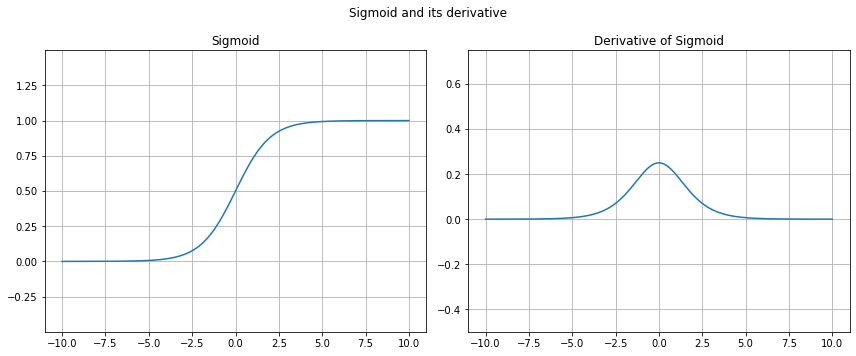

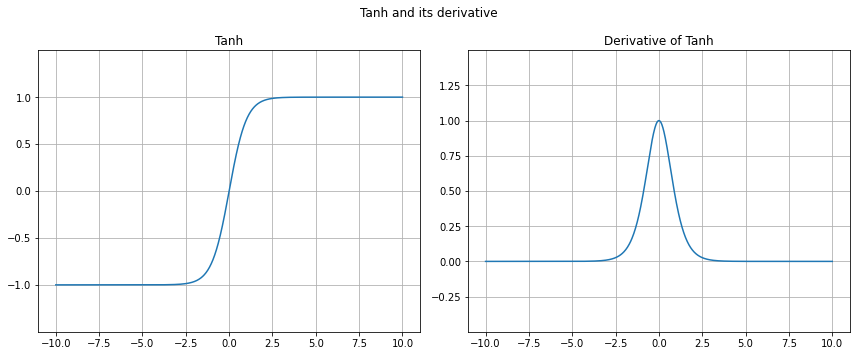

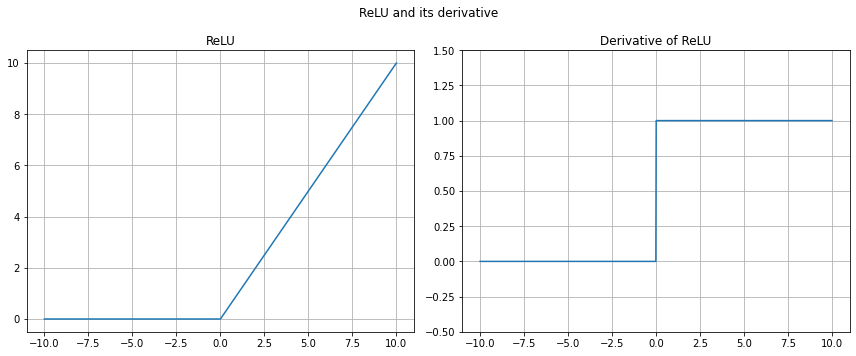

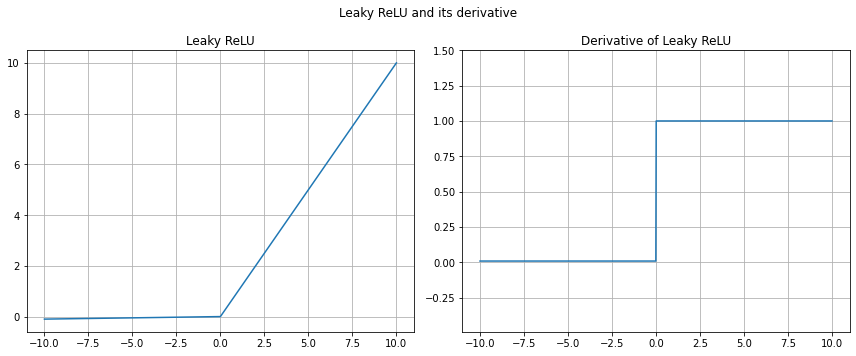

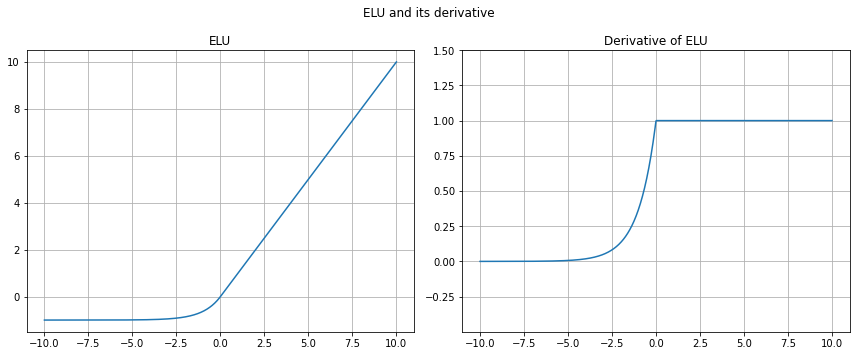

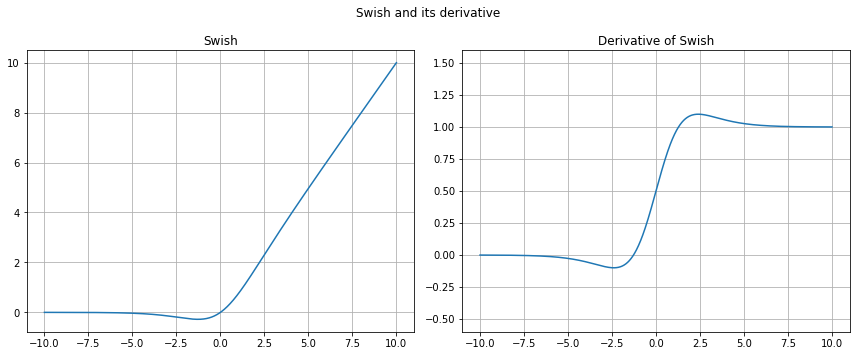

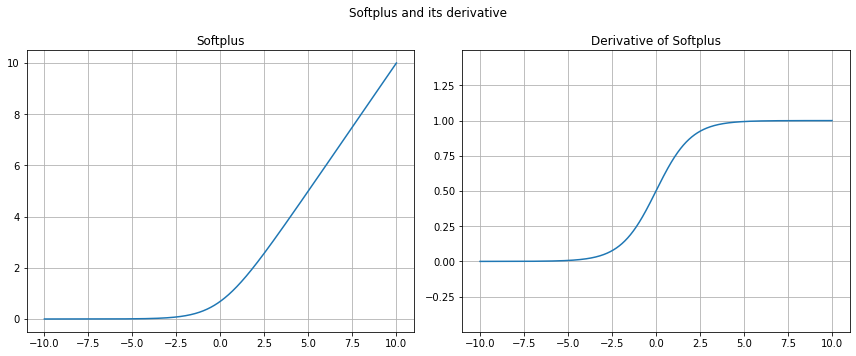

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

def swish_derivative(x, beta=1.0):
    return beta * swish(x) + sigmoid(beta * x) * (1 - beta * swish(x))

def softplus(x):
    return np.log1p(np.exp(x))

def softplus_derivative(x):
    return sigmoid(x)

def plot_function_and_derivative(func, derivative, name, x_range=(-10, 10)):
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = func(x)
    y_prime = derivative(x)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'{name} and its derivative')

    ax1.plot(x, y)
    ax1.set_title(name)
    ax1.grid(True)
    ax1.set_ylim(min(y) - 0.5, max(y) + 0.5)

    ax2.plot(x, y_prime)
    ax2.set_title(f'Derivative of {name}')
    ax2.grid(True)
    ax2.set_ylim(min(y_prime) - 0.5, max(y_prime) + 0.5)

    plt.tight_layout()
    plt.show()

# Plot each function and its derivative
plot_function_and_derivative(sigmoid, sigmoid_derivative, 'Sigmoid')
plot_function_and_derivative(tanh, tanh_derivative, 'Tanh')
plot_function_and_derivative(relu, relu_derivative, 'ReLU')
plot_function_and_derivative(leaky_relu, leaky_relu_derivative, 'Leaky ReLU')
plot_function_and_derivative(elu, elu_derivative, 'ELU')
plot_function_and_derivative(swish, swish_derivative, 'Swish')
plot_function_and_derivative(softplus, softplus_derivative, 'Softplus')

# Note: Softmax, Argmax, PReLU, and Maxout are not included as they are either
# multivariate functions or require special handling.

# Activation Functions: Comparison Table

| Function | Equation | Derivative | Use Cases | Advantages | Disadvantages |
|----------|----------|------------|-----------|------------|---------------|
| Sigmoid | σ(x) = 1 / (1 + e^(-x)) | σ'(x) = σ(x) * (1 - σ(x)) | - Binary classification<br>- Hidden layers (historically) | - Smooth gradient<br>- Output between 0 and 1 | - Vanishing gradient problem<br>- Not zero-centered<br>- Computationally expensive |
| Tanh | tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x)) | tanh'(x) = 1 - tanh^2(x) | - Hidden layers | - Zero-centered<br>- Stronger gradients than sigmoid | - Still suffers from vanishing gradient problem |
| ReLU | f(x) = max(0, x) | f'(x) = { 0 for x < 0<br>1 for x ≥ 0 | - Hidden layers<br>- CNN | - Computationally efficient<br>- Alleviates vanishing gradient<br>- ReLU activates only the neurons with positive inputs, leading to sparse activations that enhance learning efficiency while potentially causing the "dying ReLU" problem. | - "Dying ReLU" problem<br>- Not zero-centered |
| Leaky ReLU | f(x) = { αx for x < 0<br>x for x ≥ 0 | f'(x) = { α for x < 0<br>1 for x ≥ 0 | - Hidden layers | - Zero-centered<br>- Prevents dying ReLU problem<br>- Negative inputs can have non-zero gradients | - Inconsistent results for negative inputs |
| ELU | f(x) = { α(e^x - 1) for x < 0<br>x for x ≥ 0 | f'(x) = { α * e^x for x < 0<br>1 for x ≥ 0 | - Hidden layers | - Smooth function<br>- Handles negative inputs well | - Computationally more expensive than ReLU |
| Softmax | σ(z)_i = e^(z_i) / Σ(e^(z_j)) | ∂σ(z)_i / ∂z_j = { σ(z)_i * (1 - σ(z)_i) if i = j<br>-σ(z)_i * σ(z)_j if i ≠ j | - Output layer for multi-class classification | - Outputs sum to 1<br>- Useful for probability distribution | - Computationally expensive<br>- Can cause exploding gradients |
| Argmax | argmax_i(x_i) = index of max value in x | Not differentiable | - Final decision in classification | - Simple decision rule | - Not differentiable<br>- Loses probability information |
| PReLU | f(x) = { αx for x < 0<br>x for x ≥ 0 | f'(x) = { α for x < 0<br>1 for x ≥ 0 | - Hidden layers | - Learns the optimal slope for negative inputs | - Can overfit on small datasets |
| Swish | f(x) = x * sigmoid(βx) | f'(x) = βf(x) + sigmoid(βx)(1 - βf(x)) | - Hidden layers | - Non-monotonic<br>- Smooth function | - Computationally expensive |
| Maxout | f(x) = max(w1^T x + b1, w2^T x + b2, ...) | Piecewise linear | - Hidden layers | - Generalizes ReLU and Leaky ReLU<br>- Does not have zero saturation | - Doubles the number of parameters |
| Softplus | f(x) = ln(1 + e^x) | f'(x) = 1 / (1 + e^(-x)) | - Hidden layers | - Smooth version of ReLU<br>- Always positive output | - Computationally expensive<br>- Can suffer from vanishing gradient |



### Loss functions:

| Loss Function | Equation | Use Cases | Advantages | Disadvantages |
|---------------|----------|-----------|------------|---------------|
| L1 Loss (Mean Absolute Error) | $L = \frac{1}{n}\sum_{i=1}^n \|y_i - \hat{y}_i\|$ | Regression | - Robust to outliers<br>- Computationally efficient | - Not differentiable at zero<br>- Can lead to multiple solutions |
| L2 Loss (Mean Squared Error) | $L = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$ | Regression | - Differentiable everywhere<br>- Unique solution<br>- Penalizes large errors more | - Sensitive to outliers |
| Huber Loss | $L = \begin{cases} \frac{1}{2}(y - \hat{y})^2 & \text{for } \|y - \hat{y}\| \leq \delta \\ \delta(\|y - \hat{y}\| - \frac{1}{2}\delta) & \text{otherwise} \end{cases}$ | Regression | - Combines benefits of L1 and L2<br>- Less sensitive to outliers than L2 | - Requires tuning of δ parameter |
| Hinge Loss | $L = \max(0, 1 - y \cdot \hat{y})$ | Binary Classification (e.g., SVM) | - Maximizes margin<br>- Works well for linearly separable data | - Not probabilistic<br>- Only for binary classification |
| Cross-entropy Loss | $L = -\sum_{i=1}^n y_i \log(\hat{y}_i)$ | Multi-class Classification | - Suitable for multi-class problems<br>- Provides probabilistic output | - Can be sensitive to class imbalance |
| Sigmoid Cross-entropy Loss | $L = -y \log(\sigma(\hat{y})) - (1-y) \log(1-\sigma(\hat{y}))$ | Binary Classification | - Provides probabilistic output<br>- Suitable for binary classification | - Can suffer from vanishing gradients |
| Softmax Cross-entropy Loss | $L = -\sum_{i=1}^n y_i \log(\frac{e^{\hat{y}_i}}{\sum_{j=1}^n e^{\hat{y}_j}})$ | Multi-class Classification | - Normalizes output to probabilities<br>- Handles multi-class problems well | - Computationally expensive for large number of classes |
| Adaptive Loss | $L = \frac{\|x\|^p}{p}$ where $p = 2 - 2/(1 + (x/c)^2)$ | Robust Regression and Computer Vision | - Adapts between L1 and L2 loss<br>- Robust to outliers and inliers | - Requires careful tuning of hyperparameters |



# optimizers:
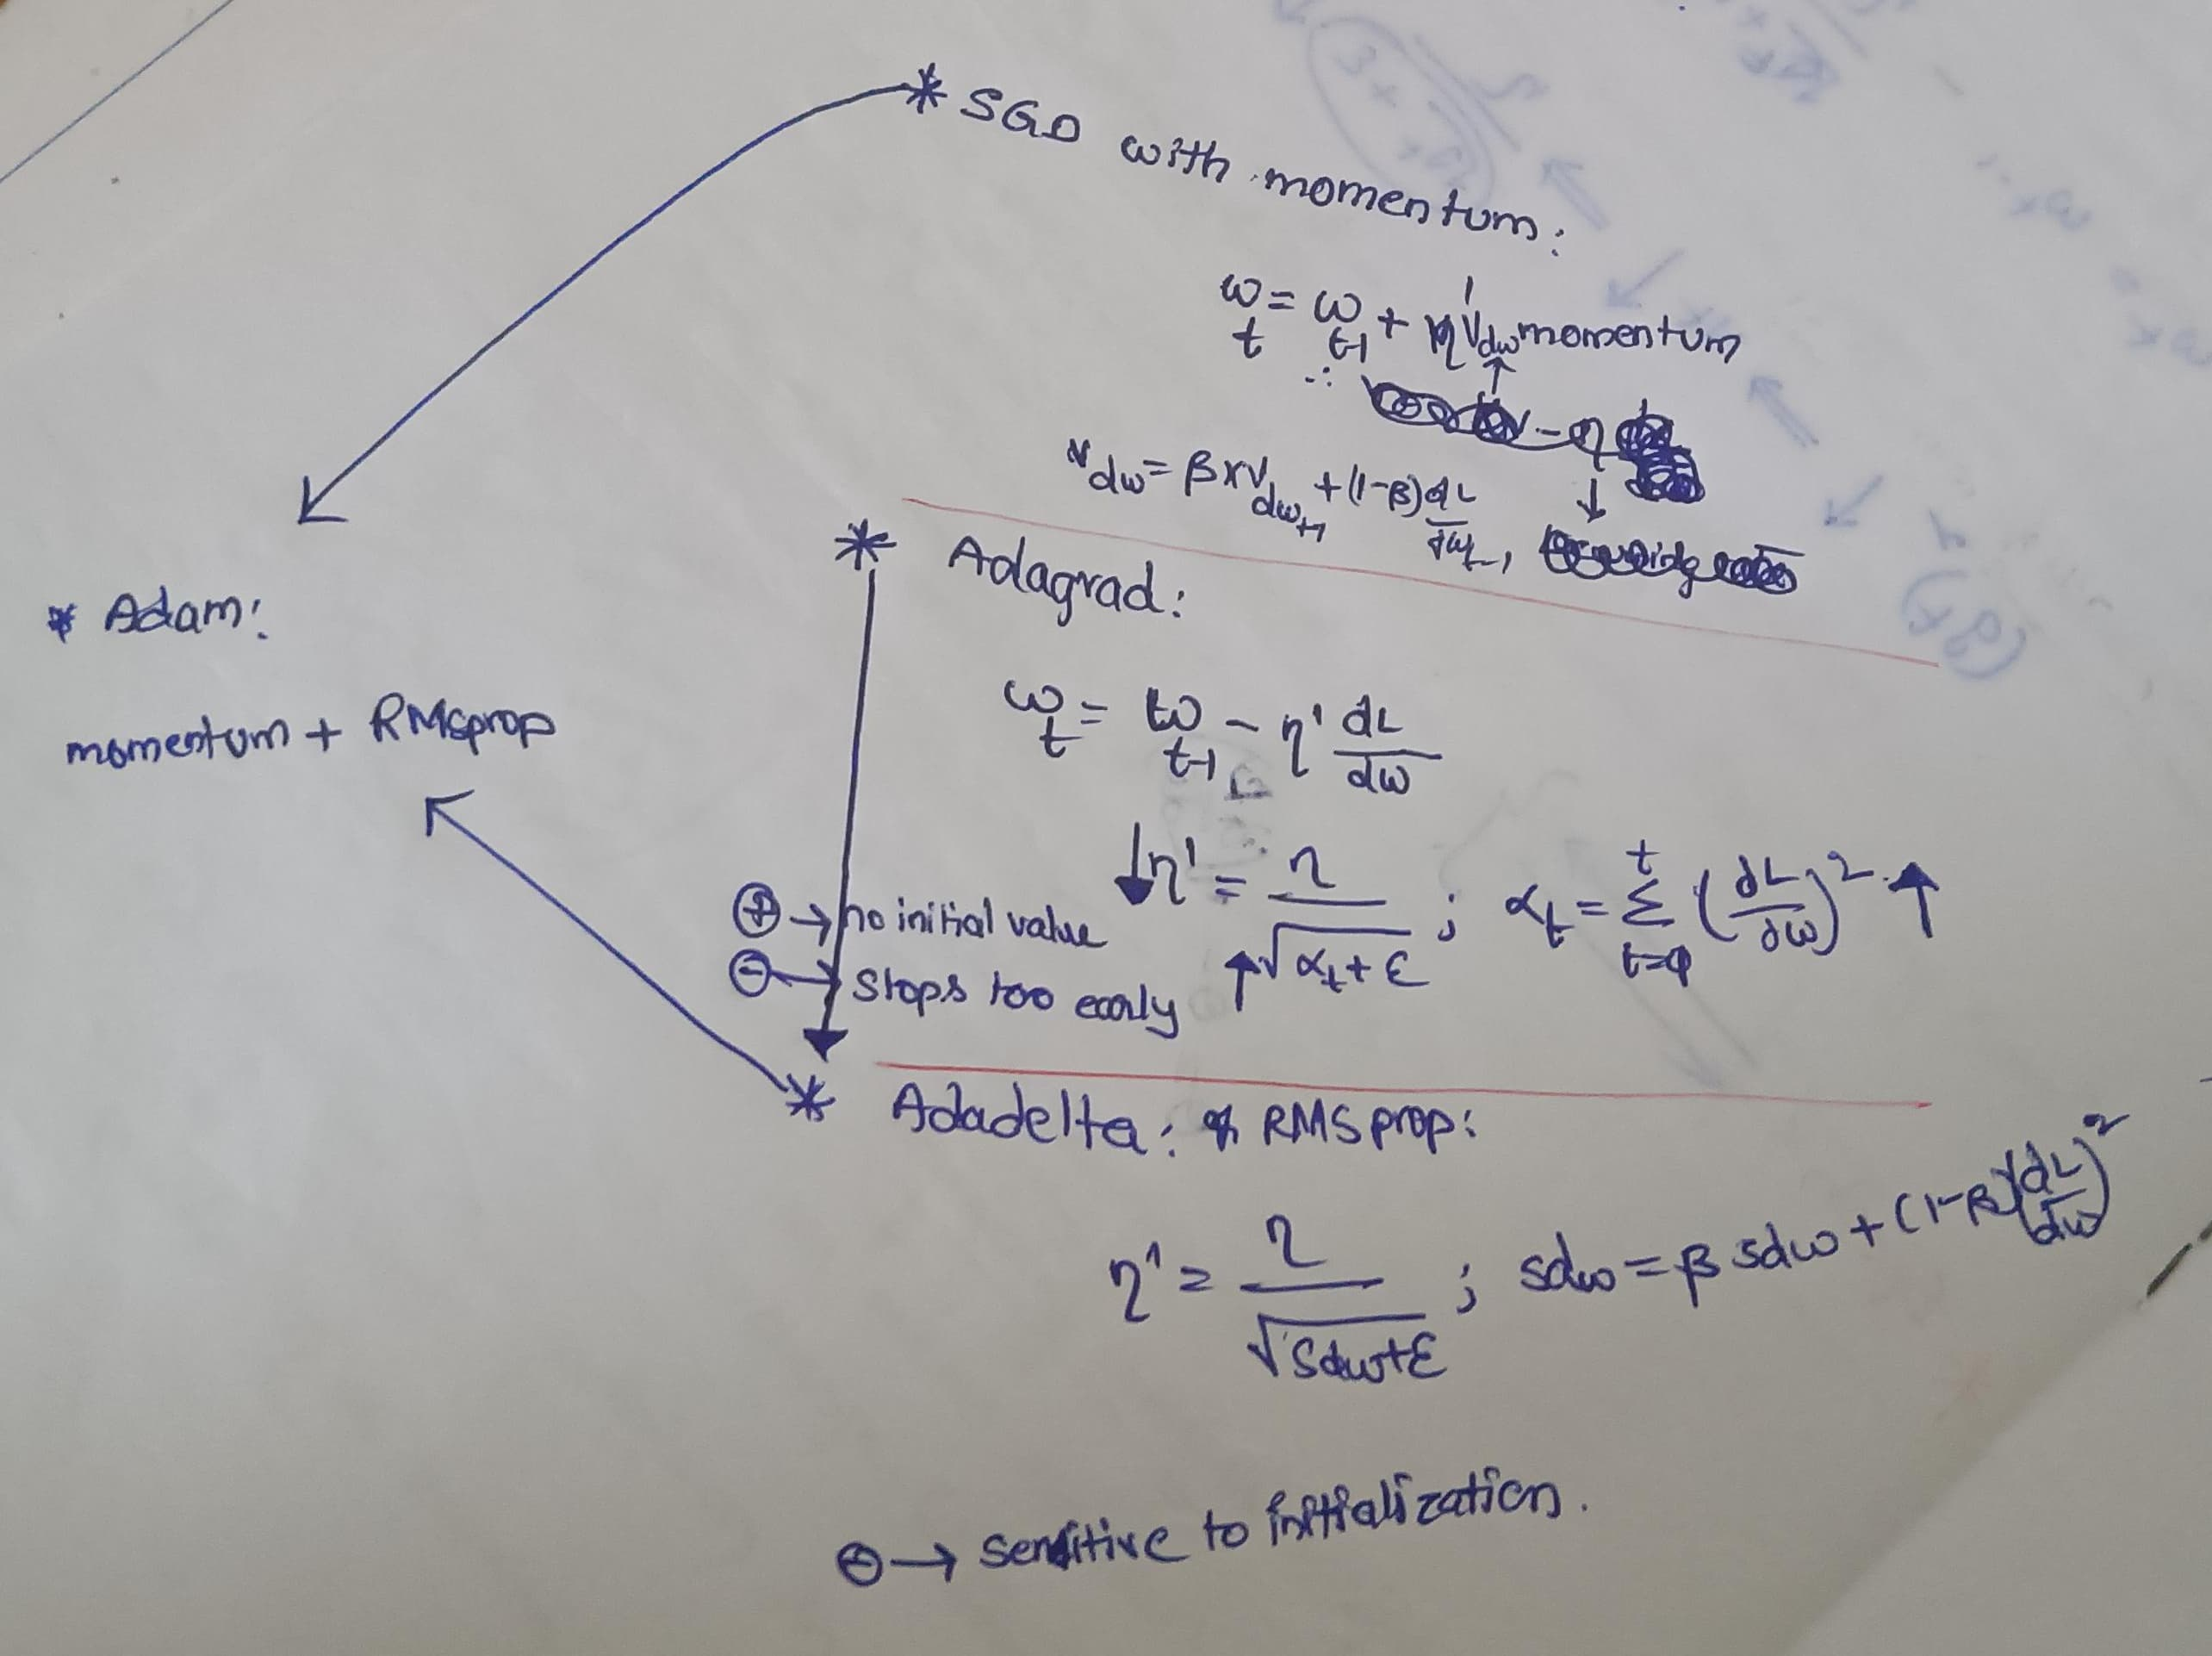

| Optimizer | Where It's Used | Update Strategy | Advantages | Disadvantages |
|-----------|-----------------|-----------------|------------|---------------|
| Batch Gradient Descent | • Small to medium datasets<br>• Problems requiring high accuracy<br>• When computational efficiency is not a primary concern<br>• Offline learning scenarios | • Computes gradient using entire dataset<br>• Updates parameters once per epoch<br>• θ = θ - η * ∇J(θ)<br>• Fixed learning rate η | • Stable and predictable convergence<br>• Accurate gradient estimation<br>• Easier to parallelize<br>• Guaranteed convergence to global minimum for convex problems | • Very slow for large datasets<br>• High memory requirements<br>• Can get stuck in local minima for non-convex problems<br>• Computationally expensive per update |
| Stochastic Gradient Descent (SGD) | • Large datasets<br>• Online learning scenarios<br>• When quick iterations are needed<br>• Problems with redundant examples | • Computes gradient using a single example<br>• Updates parameters after each example<br>• θ = θ - η * ∇J(θ; x(i), y(i))<br>• Can use a decaying learning rate | • Fast iterations<br>• Low memory requirements<br>• Can escape local minima<br>• Suitable for online learning | • High variance in parameter updates<br>• Requires many iterations to converge<br>• May not reach the exact minimum<br>• Sensitive to feature scaling |
| Mini-batch Gradient Descent | • Most common in deep learning<br>• Large datasets<br>• When balance between speed and accuracy is needed<br>• GPU-accelerated computing | • Computes gradient using a small batch of examples<br>• Updates parameters after each mini-batch<br>• θ = θ - η * ∇J(θ; x(i:i+n), y(i:i+n))<br>• Typically uses a fixed learning rate | • Good balance between accuracy and speed<br>• Reduces variance in parameter updates<br>• Allows for efficient use of matrix optimizations<br>• Can make use of GPU acceleration | • Still requires tuning of learning rate<br>• May struggle with very small datasets<br>• Can still get trapped in local minima<br>• Sensitive to batch size selection |
| Momentum | • Problems with small, frequent features<br>• When SGD oscillates<br>• Deep neural networks<br>• RNNs and LSTMs | • Accumulates a velocity vector<br>• v = γv - η∇J(θ)<br>• θ = θ + v<br>• Uses momentum coefficient γ | • Faster convergence<br>• Reduces oscillations in SGD<br>• Can overcome local minima and saddle points<br>• Works well with RNNs | • Can overshoot the minimum<br>• Introduces an additional hyperparameter (momentum)<br>• May perform poorly with sparse data<br>• Can accumulate too much momentum in wrong directions |
| Adagrad | • Sparse data problems<br>• Natural language processing<br>• Computer vision tasks<br>• When features have different scales | • Adapts learning rate for each parameter<br>• Accumulates squared gradients<br>• θ(t+1) = θ(t) - η / √(G(t) + ε) * g(t)<br>• G(t) is the sum of squares of past gradients | • Eliminates manual tuning of learning rate<br>• Works well with sparse data<br>• Automatically adapts to feature importance<br>• Improves convergence in problems with varying feature scales | • Aggressive, monotonically decreasing learning rate<br>• May stop learning too early<br>• Accumulation of squared gradients in denominator<br>• Not suitable for non-convex optimization in deep learning |
| Adadelta | • General purpose optimizer<br>• Deep neural networks<br>• When learning rate tuning is difficult<br>• Non-convex optimization problems | • Adapts learning rates based on a moving window of gradient updates<br>• Uses RMS of parameter updates<br>• Δθ(t) = -RMS[Δθ](t-1) / RMS[g](t) * g(t)<br>• θ(t+1) = θ(t) + Δθ(t) | • No need to set a default learning rate<br>• Robust to large gradients, noise and architecture choices<br>• Automatically adapts learning rate<br>• Theoretically solves Adagrad's decreasing learning rate problem | • May be slower than other adaptive methods in some cases<br>• Can have trouble making progress on deep networks<br>• Sensitive to initial conditions<br>• May perform poorly in online learning scenarios |
| RMSprop | • Non-stationary problems<br>• Online learning scenarios<br>• When Adagrad learns too slowly<br>• Classification tasks | • Utilizes a moving average of squared gradients<br>• E[g²](t) = 0.9E[g²](t-1) + 0.1g(t)²<br>• θ(t+1) = θ(t) - η / √(E[g²](t) + ε) * g(t)<br>• Adapts the learning rate for each parameter | • Prevents the learning rate from becoming infinitesimally small<br>• Works well in online and non-stationary settings<br>• Faster convergence compared to standard SGD<br>• Good performance on sparse data | • Still requires setting a global learning rate<br>• Can suffer from slowing down at the end of training<br>• May have trouble on some optimization landscapes<br>• Sensitive to initialization of accumulator |
| Adam | • Deep learning models<br>• Computer vision tasks<br>• Natural language processing<br>• Generative models (GANs) | • Combines ideas from momentum and RMSprop<br>• Maintains both a moving average of gradients and squared gradients<br>• m(t) = β1m(t-1) + (1-β1)g(t)<br>• v(t) = β2v(t-1) + (1-β2)g(t)²<br>• θ(t+1) = θ(t) - η * m̂(t) / (√v̂(t) + ε) | • Adaptive learning rates for each parameter<br>• Combines benefits of Momentum and RMSprop<br>• Bias correction helps in the initial stages of training<br>• Works well in practice for many problems | • Can converge to a suboptimal solution in some cases<br>• May have high memory requirements<br>• Learning rate still requires tuning for some problems<br>• Can be outperformed by SGD in some cases |

Note: η represents the learning rate, θ represents the parameters, and g represents the gradient. The exact implementation and performance of these optimizers can vary depending on the specific problem, dataset, and model architecture.

Here’s an updated table with tasks adjusted based on the number of independent features and data size:

| Scenario                    | Task                          | Recommended Activation Function | Loss Function                 | Optimizer                   |
|-----------------------------|-------------------------------|---------------------------------|-------------------------------|-----------------------------|
| **More independent features**| Regression                    | None / ReLU                     | Mean Squared Error (MSE)       | Adam, RMSprop               |
| **Less independent features**| Regression                    | None / ReLU                     | Mean Squared Error (MSE)       | Adam, SGD                   |
| **Large dataset**            | Binary Classification         | Sigmoid                         | Binary Cross-Entropy           | Adam, RMSprop               |
| **Small dataset**            | Binary Classification         | Sigmoid                         | Binary Cross-Entropy           | Adam, SGD                   |
| **More independent features**| Multiclass Classification     | Softmax                         | Categorical Cross-Entropy      | Adam, RMSprop               |
| **Less independent features**| Multiclass Classification     | Softmax                         | Categorical Cross-Entropy      | Adam, SGD                   |
| **Large dataset**            | Deep Learning (CNNs, RNNs)    | ReLU                            | Cross-Entropy                  | Adam, RMSprop               |
| **Small dataset**            | Deep Learning (CNNs, RNNs)    | ReLU                            | Cross-Entropy                  | Adam, SGD                   |



In practice, standard ReLU is often chosen unless the model experiences vanishing gradients or dead neurons, in which case Leaky ReLU or other alternatives (like ELU or SELU) might be considered. So, the choice often depends on the specific network and dataset.

 key **deep learning** (DL) terms related to training and regularization, excluding activation functions, loss functions, and optimizers:

| **Term**                     | **Definition**                                                                 | **Commonly Asked Questions**                                                                 | **Key Concepts**                                                                                |
|------------------------------|---------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| **Backpropagation**           | Algorithm to compute gradients of the loss function w.r.t. each weight by using the chain rule. | - Explain backpropagation in training.<br>- How does backpropagation work with gradient descent? | Chain rule, weight updates, error propagation, gradient calculation                             |
| **Gradient Descent**          | Optimization algorithm that minimizes the loss function by updating weights in the direction of the negative gradient. | - What’s the difference between Batch, Mini-batch, and Stochastic Gradient Descent?<br>- How does learning rate affect GD? | Weight update rules, learning rate, convergence, step size                                      |
| **Learning Rate**             | Step size used for updating weights during gradient descent.                    | - What happens if the learning rate is too high or too low?<br>- What’s a learning rate schedule? | Convergence speed, learning rate schedule, adaptive learning rates (e.g., in Adam)               |
| **Epochs**                    | One full pass through the entire training dataset.                              | - How many epochs should be used?<br>- What are the consequences of too few or too many epochs? | Overfitting risk, underfitting, validation performance                                           |
| **Batch Size**                | Number of training examples processed before updating model parameters.         | - How does batch size affect performance?<br>- Trade-offs between small and large batch sizes? | Mini-batch vs full batch, memory consumption, noise in gradients, computational efficiency       |
| **Regularization**            | Techniques to prevent overfitting by adding a penalty to the model complexity.  | - Explain L1 and L2 regularization.<br>- What’s the role of dropout?<br>- How do these methods prevent overfitting? | L1/L2 regularization (Ridge, Lasso), weight decay, dropout, overfitting prevention               |
| **Dropout**                   | Regularization technique that randomly drops units during training to prevent overfitting. | - How does dropout help?<br>- What’s the effect of dropout rate on performance?               | Random neuron deactivation, overfitting control, dropout rate tuning                             |
| **Batch Normalization**       | Technique to normalize activations during training, stabilizing the learning process. | - Why is batch normalization important?<br>- How does it help training?<br>- When to apply?   | Internal covariate shift, faster convergence, normalization layers                               |
| **Early Stopping**            | Technique to stop training when the validation error starts increasing, to prevent overfitting. | - How does early stopping prevent overfitting?<br>- How to determine when to stop training?   | Validation performance, generalization, overfitting avoidance                                   |
| **Vanishing/Exploding Gradients** | Gradients become too small (vanishing) or too large (exploding) during backpropagation, causing issues in training deep networks. | - What causes vanishing/exploding gradients?<br>- How can these issues be solved (e.g., ReLU, gradient clipping)? | Deep network training, ReLU for vanishing gradients, gradient clipping for exploding gradients   |
| **Hyperparameter Tuning**     | Process of selecting the best hyperparameters (e.g., learning rate, batch size) to optimize model performance. | - How do you tune hyperparameters?<br>- What’s the difference between grid search and random search? | Grid search, random search, Bayesian optimization, hyperparameter ranges                         |
| **Overfitting and Underfitting** | **Overfitting**: Model performs well on training data but poorly on unseen data.<br>**Underfitting**: Model performs poorly on both training and unseen data. | - How do you detect overfitting?<br>- What methods can you use to mitigate it?                | Bias-variance tradeoff, generalization, cross-validation, regularization methods                  |
| **Weight Initialization**     | Strategy for setting the initial values of the weights before training starts.  | - How do different initialization methods affect training?<br>- What’s the Xavier/He initialization? | Xavier initialization, He initialization, convergence speed, symmetry breaking                   |

 

---
---

### why bais is there in parameters?

In neural networks, **bias** is an important parameter that plays a crucial role alongside weights in determining the output of a neuron. Here's when and why to use bias:

### When to Use Bias
1. **Every Neuron**: 
   - In most architectures, each neuron (or unit) in a layer should have an associated bias. This is true for fully connected layers, convolutional layers, and recurrent layers. 
   - The bias allows the activation function to shift to the left or right, which enables the model to better fit the training data.

2. **Non-Linearity**:
   - Bias is particularly important when using non-linear activation functions (like ReLU, Sigmoid, Tanh, etc.). Without bias, the output of the activation function might be constrained to a specific range, making it harder for the model to learn complex patterns.

3. **Learning Complex Functions**:
   - Bias helps the model learn more complex functions. For example, if you consider a linear model \(y = wx + b\), the weight \(w\) determines the slope, while the bias \(b\) allows the model to fit data that doesn't necessarily pass through the origin.

### When Not to Use Bias
1. **Certain Architectures**:
   - Some specific architectures or configurations might not use bias, such as:
     - **Output Layer of Some Models**: For example, in some cases, particularly when performing regression tasks, the output layer might not use bias if the problem is strictly linear and passes through the origin.
     - **Normalization Layers**: In some cases where normalization layers like Batch Normalization are applied, the bias might be redundant since normalization adjusts the output mean and variance.

2. **Zero Initialization**:
   - When initializing weights, biases are often initialized to zero, but for some specific architectures, especially those using techniques like Layer Normalization or Batch Normalization, you may decide to omit bias to avoid redundancy.

### Summary
- **Bias is generally essential** for neural networks as it allows for flexibility in the model and enhances its capacity to learn from the data.
- **In most scenarios**, it is advisable to include bias in each layer, especially in fully connected and convolutional layers, to achieve better learning performance. 

Overall, while weights are crucial for determining the relationships between inputs and outputs, bias enables the model to have a more adaptable and complex decision boundary.

---
---

### vanishing gradient problem...solved by resnet architecture first:

Absolutely! The addition of the input in ResNet helps to mitigate the vanishing gradient problem, and this has a direct impact on the derivatives involved in the backpropagation process. Let's clarify this by revisiting the derivatives and showing how they change due to the inclusion of the skip connection.

### **Forward Propagation with Residuals**

In ResNet, the output \( y \) from a residual block is given by:

$$
y = F(x) + x
$$

where:
- \( F(x) \) is the residual mapping learned by the network.
- \( x \) is the original input to the block.

### Visual Representation

If you visualize a typical ResNet block, it would look like this:

```
Input (x)
   |
+--------+
| Conv   |
| Layer  |
+--------+
   |
   +------+
   |      |
   v      v
+--------+
| Add    | (y = F(x) + x)
+--------+
   |
Output (y)
```

In this diagram, the input \( x \) is passed through a convolutional layer and then added back to the output, facilitating better gradient flow.


### **Backward Propagation through Residuals**

When calculating gradients, we have:

1. **Loss Function Gradient with Respect to Output**:
   $$ 
   \frac{\partial J}{\partial y} 
   $$

2. **Gradient of the Residual Mapping**:
   The gradient of the loss with respect to the residual mapping \( F(x) \) becomes:

   $$ 
   \frac{\partial J}{\partial F(x)} = \frac{\partial J}{\partial y} 
   $$

3. **Gradient with Respect to Input \( x \)**:
   For the input \( x \), we consider both the contribution from \( F(x) \) and the identity mapping:

   $$ 
   \frac{\partial J}{\partial x} = \frac{\partial J}{\partial F(x)} + \frac{\partial J}{\partial y} 
   $$

   This can be rewritten as:

   $$
   \frac{\partial J}{\partial x} = \frac{\partial J}{\partial y} + \frac{\partial J}{\partial F(x)} 
   $$

### **Key Changes in Derivatives**
The key insight is that by adding the input \( x \) back into the residual output \( F(x) \):

- The derivative \( \frac{\partial J}{\partial x} \) can now be expressed as a sum of two components: the derivative from the output \( y \) and the derivative from the residual mapping \( F(x) \). This addition allows gradients to flow more easily through the network, reducing the likelihood of vanishing gradients.

### **Final Gradient Flow in ResNet**
The gradients flowing back through a ResNet block can be interpreted as follows:

1. **Contribution from the Residual Mapping**:
   - The gradient through the learned function \( F(x) \) captures the relationship of the loss with the features learned by the convolutional layers.

2. **Direct Contribution from the Input**:
   - The addition of \( x \) ensures that there is always a pathway for gradients to flow, effectively allowing gradients to "skip" over layers if they are small or poorly trained.

### **Parameter Updates**
Once we have computed the gradients, we perform the parameter updates as usual:

- **Weight Updates**:
  - For the weight matrices and biases:
  
$$
\begin{align*}
\mathbf{W}_2 &\leftarrow \mathbf{W}_2 - \alpha \frac{\partial J}{\partial \mathbf{W}_2} \\
\mathbf{b}_2 &\leftarrow \mathbf{b}_2 - \alpha \frac{\partial J}{\partial \mathbf{b}_2} \\
\mathbf{W}_1 &\leftarrow \mathbf{W}_1 - \alpha \frac{\partial J}{\partial \mathbf{W}_1} \\
\mathbf{b}_1 &\leftarrow \mathbf{b}_1 - \alpha \frac{\partial J}{\partial \mathbf{b}_1}
\end{align*}
$$

### Summary
In summary, the inclusion of the input \( x \) in the residual block fundamentally alters the flow of gradients during backpropagation, allowing for a more robust learning process that effectively addresses the vanishing gradient problem. This structural change enhances the network's ability to learn deep representations without the degradation of performance typically seen in very deep networks.

---
---

what is exponential weighted avg?

---
---